Vishvender Tyagi
21BRS1203
ASSIGNMENT3


# Perform Data preprocessing on Titanic dataset



## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

## Importing the Dataset

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')

## Checking for Null Values

In [3]:
null_counts = data.isnull().sum()
null_counts

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling missing values

#### Age: filling the missing values with the mean of the 'Age' column.

In [4]:
mean_age = data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)


#### Cabin: there are a large number of missing values in the 'Cabin' column; hence dropping it.

In [5]:
data.drop('Cabin', axis=1, inplace=True)


#### Embarked: there are only two missing values, therefore filling this with the most frequent value (mode).

In [6]:
mode_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(mode_embarked, inplace=True)


### Checking again

In [7]:
null_counts = data.isnull().sum()
print(null_counts)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## Data Visualization

In [8]:
sns.set(style="whitegrid")


### Plot 1: Countplot of Survived Passengers

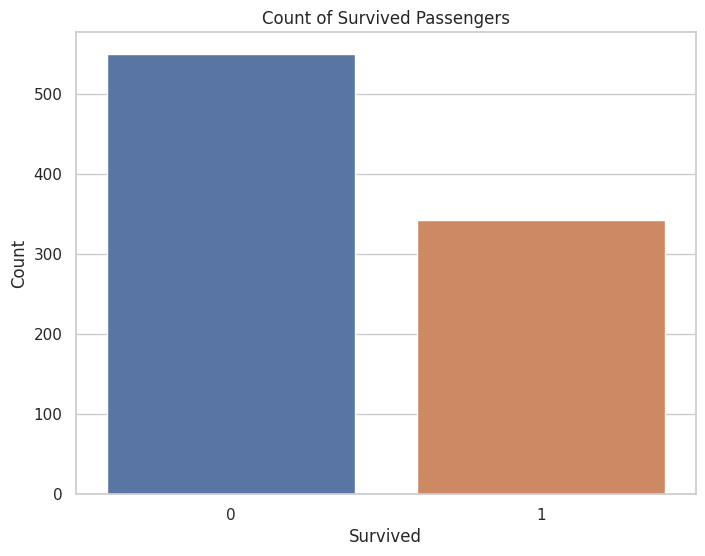

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=data)
plt.title('Count of Survived Passengers')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

#### The countplot shows that more passengers did not survive (Survived=0) than those who survived (Survived=1).

### Plot 2: Distribution of Passengers' Ages


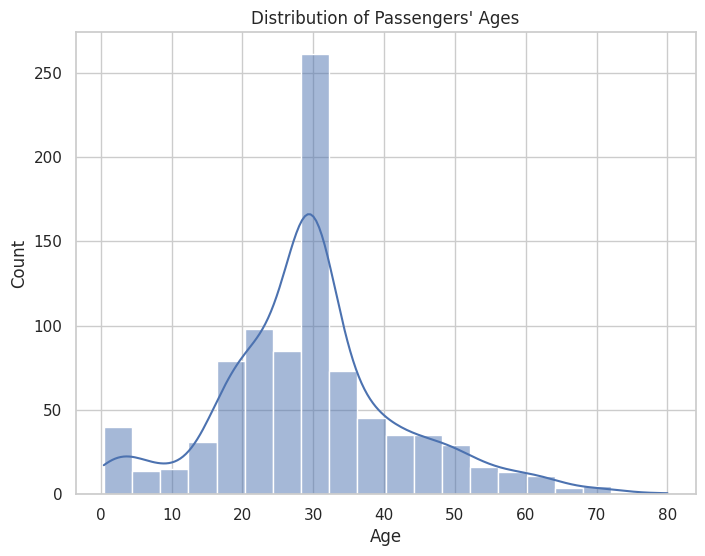

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'].dropna(), bins=20, kde=True)
plt.title('Distribution of Passengers\' Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### The distribution of passengers' ages is somewhat right-skewed, with a higher concentration of passengers in the younger age groups.

### Plot 3: Countplot of Passengers' Classes (Pclass)

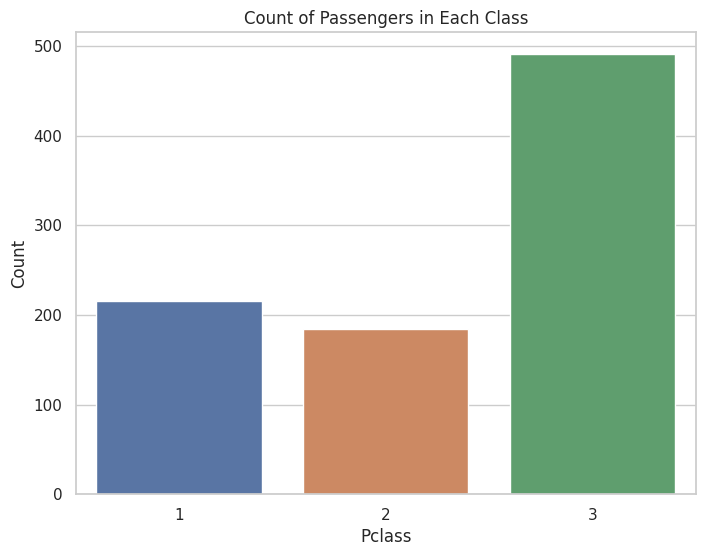

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=data)
plt.title('Count of Passengers in Each Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

#### Most passengers were in the 3rd class (Pclass=3), followed by the 1st class (Pclass=1), and the 2nd class (Pclass=2).

### Plot 4: Boxplot of Fare by Passenger Class (Pclass)

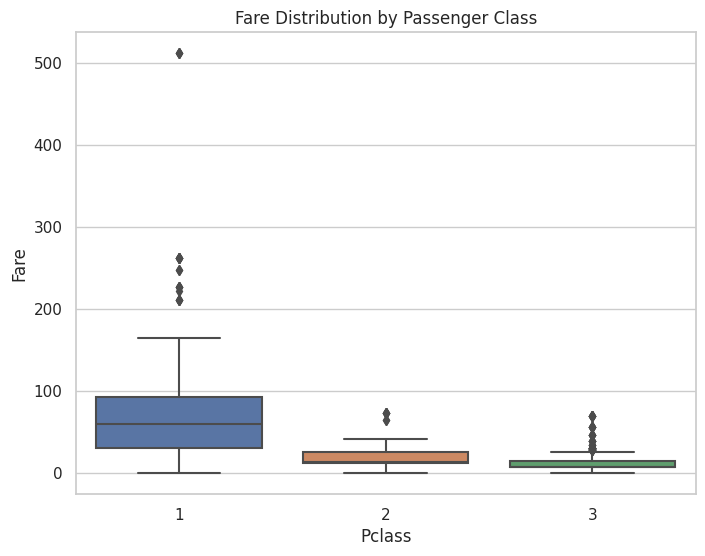

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

#### The boxplot reveals that 1st class passengers (Pclass=1) generally paid higher fares compared to 2nd and 3rd class passengers. There are also some outliers in the 1st class fare distribution.

### Plot 5: Countplot of Passengers' Gender (Sex)

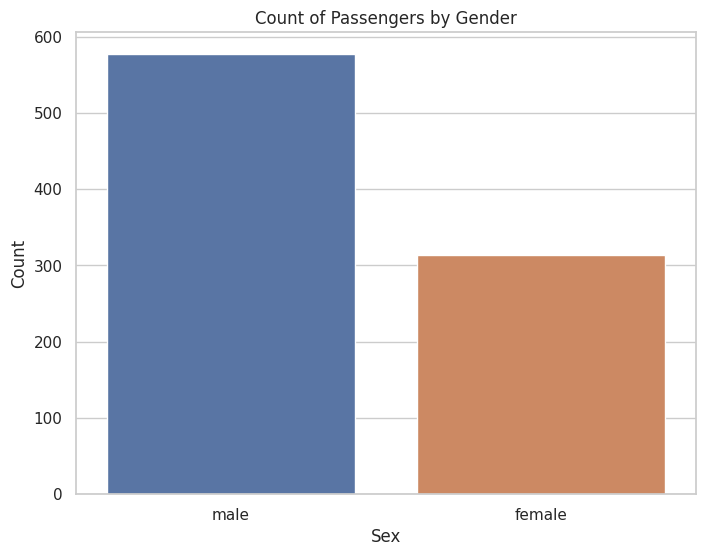

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=data)
plt.title('Count of Passengers by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

#### The countplot shows that there were more male passengers (Sex=Male) than female passengers (Sex=Female) on the Titanic.

## Outlier Detection

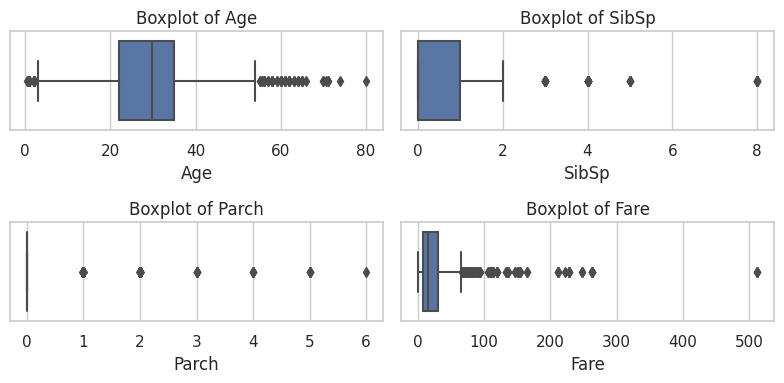

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,4))

sns.boxplot(x='Age', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Age')
sns.boxplot(x='SibSp', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of SibSp')
sns.boxplot(x='Parch', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Parch')
sns.boxplot(x='Fare', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Fare')

plt.tight_layout()
plt.show()

- Outliers in 'Age' are not very apparent, but there are a few older passengers with ages significantly higher than the majority.
- 'SibSp' and 'Parch' have some outliers, which indicate passengers with an unusually large number of siblings/spouses or parents/children aboard.
- 'Fare' has visible outliers with fares much higher than the majority of passengers.


## Splitting Dependent and Independent variables

- Before splitting, we have to drop 'Name' and 'Ticket' columns as it is not helpful for further process.

In [15]:
data = data.drop(["Name", "Ticket"], axis=1)

In [16]:
X = data.drop("Survived", axis=1)  # Attributes
y = data["Survived"]  # Target variable

In [17]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [18]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Encoding the required attributes

In [19]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Using one-hot encoding for the 'Sex' column

In [20]:
data = pd.get_dummies(data, columns=["Sex"], drop_first=True)


### Using one-hot encoding for the 'Embarked' column

In [21]:
data = pd.get_dummies(data, columns=["Embarked"], drop_first=True)

In [22]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Feature Scaling

In [23]:
scaler = MinMaxScaler()
data[["Age", "Fare"]] = scaler.fit_transform(data[["Age", "Fare"]])

## Splitting Data into Train and Test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)